<a href="https://colab.research.google.com/github/amelliaaas/PraktikumML_282-305/blob/Kelas_mechine_learning/CNN_Modifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Covid19-dataset

/content/drive/MyDrive/Covid19-dataset


In [3]:
# Definisikan path untuk data train dan data validation
import os

base_dir = '/content/drive/MyDrive/Covid19-dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

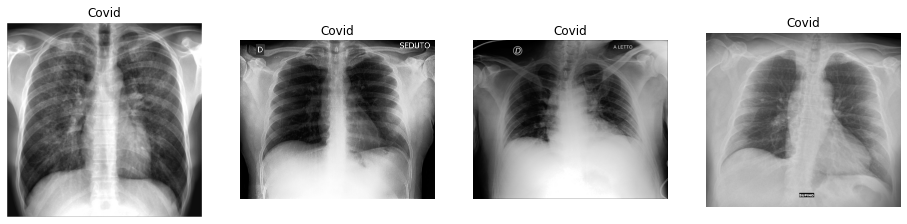

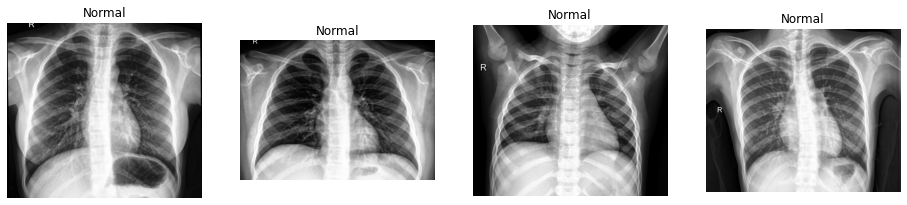

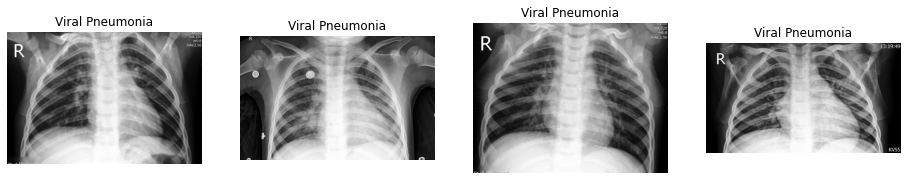

In [4]:
#3.Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom

import matplotlib.pyplot as plt
import matplotlib.image as mping

traincovid_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Covid')
trainnormal_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Normal')
trainviralpneumonia_dir = os.path.join('/content/drive/MyDrive/Covid19-dataset/train/Viral Pneumonia')

covid_image = os.listdir(traincovid_dir)
normal_image = os.listdir(trainnormal_dir)
viralpneumonia_image = os.listdir(trainviralpneumonia_dir)

fname1 = [os.path.join(traincovid_dir,fname)
        for fname in covid_image[1:5]]

fname2 = [os.path.join(trainnormal_dir,fname)
        for fname in normal_image[1:5]]

fname3 = [os.path.join(trainviralpneumonia_dir,fname)
        for fname in viralpneumonia_image[1:5]]

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Covid')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Normal')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 3
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*3)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Viral Pneumonia')
    plt.imshow(img)
    
plt.show()

In [5]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [6]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [7]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (251, 150, 150, 3)
Train Label =  (251,)
Validation Data =  (69, 150, 150, 3)
Validation Label =  (69,)


In [8]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [6 6 6]
Data setelah di-normalisasi  [0.02352941 0.02352941 0.02352941]


In [9]:
#3. Membuat Label Encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[3:250])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[3:250])

Label sebelum di-encoder  ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia' 'Viral Pneumonia'
 'Viral Pneumonia' 'Viral Pneumoni

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Flatten

# Feature Extraction Layer
model = Sequential()
model.add(InputLayer(input_shape = [150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))

# Summary Scenario Pertama
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [11]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [12]:
Training_model = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
13/13 [==============================] - 9s 615ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2899
Epoch 2/15
13/13 [==============================] - 8s 600ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2899
Epoch 3/15
13/13 [==============================] - 8s 592ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2899
Epoch 4/15
13/13 [==============================] - 8s 596ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2899
Epoch 5/15
13/13 [==============================] - 8s 596ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2899
Epoch 6/15
13/13 [==============================] - 8s 599ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2899
Epoch 7/15
13/13 [==============================] - 8s 601ms/step - loss: 0.0000e+00 - acc: 0.2789 - val_loss: 0.0000e+00 - val_acc: 0.2899
Epoch 8/15
13/13 [==

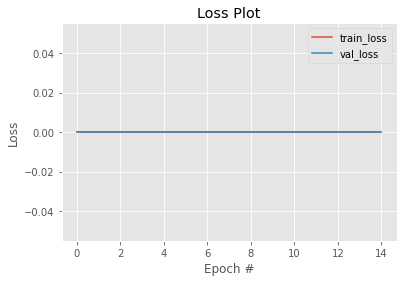

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), Training_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), Training_model.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()


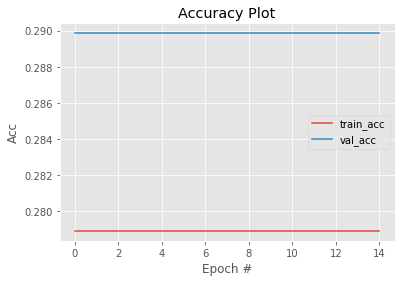

In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), Training_model.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), Training_model.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [16]:
plt.savefig("acc_1.svg")

<Figure size 432x288 with 0 Axes>

In [17]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.29      1.00      0.45        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         3

    accuracy                           0.29        69
   macro avg       0.07      0.25      0.11        69
weighted avg       0.08      0.29      0.13        69



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
